# Regression per Group
Mortality from coronary heart disease

###  Mortality from coronary heart disease

In this documentation, we are focusing on question:

"Mortality from coronary heart disease"


We splitted data into training and testing, set up cross-validation, and used the accuracy to measure the performance of our models. The results shown as follow:

Mortality on Races and other features:
- Group 0: 97.60%
- Group 1: 91.48%
- Group 2: 94.80%
- Group 3: 98.66%

Overall summary:

- Group 0: High CH4, Fluorinated GHG, and Ozone level, such as GA and IN


    White, Black, Asian or Pacific Islander, Utility/Pivate Incentives, and CO2 per square are the top 5 influncial contributers to the mortality from coronary heart disease.


- Group 1: High Ozone level but low other pollutant emissions, such as WA and MA. The most common group


    White, Hispanic, Asian or Pacific Islander, CO2 per pop, and Ozone are the top 5 influncial contributers to the mortality from coronary heart disease.


- Group 2: High CO2, CH4, N2O, and low regulation or incentives, such as FL and TX


    White and Black are the top 2 significant contributers to the mortality from coronary heart disease.


- Group 3: High regulation and incentives, such as CA


    White, Black, Hispanic, and Asian or Pacific Islander are the top 3 significant contributers to the mortality from coronary heart disease.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Prepare data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('~/Desktop/finaldata_clusters_regions_Added.csv').drop(columns = ['Unnamed: 0'])

In [4]:
data['Total Sq. Mi.']=data['Total Sq. Mi.'].str.replace(',','')
data['Total Sq. Mi.'] = data['Total Sq. Mi.'].astype('int64')

In [5]:
data['CO2_PER_POP'] = data['CO2'] / data['Population']
data['CO2_PER_SQUARE'] = data['CO2'] / data['Total Sq. Mi.']
data['CH4_PER_POP'] = data['CH4'] / data['Population']
data['CH4_PER_SQUARE'] = data['CH4'] / data['Total Sq. Mi.']
data['N2O_PER_POP'] = data['N2O'] / data['Population']
data['N2O_PER_SQUARE'] = data['N2O'] / data['Total Sq. Mi.']
data['Fluorinated GHG_PER_POP'] = data['Fluorinated GHG'] / data['Population']
data['Fluorinated GHG_PER_SQUARE'] = data['Fluorinated GHG'] / data['Total Sq. Mi.']

In [6]:
data.drop(['STATE', 'Year','CO2','CH4','N2O','Fluorinated GHG_PER_POP','Population','Total Sq. Mi.','Total Sq. Km.','REGION'], axis=1, inplace=True)

In [7]:
data = data[~data['StratificationCategory1'].isnull()]
cols = data.columns.tolist()
cols = cols[7:] + cols[:7]
data = data[cols]

In [8]:
data.head()

,DataValue,StratificationCategory1,Stratification1,Region_Name,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,cluster,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question
0,234.8,Gender,Female,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Mortality from diseases of the heart
1,14.9,Gender,Female,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
2,8.6,Gender,Male,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
3,8.9,Race/Ethnicity,"White, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
4,21.8,Race/Ethnicity,"Black, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate


### 3. Mortality from coronary heart disease

In [9]:
data_q3 = data[data['Question']=='Mortality from coronary heart disease']

In [10]:
data_q3_1 = data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity']
data_q3_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q3_1 = data_q3_1[~data_q3_1['DataValue'].isnull()]

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
data_q3_1.head()

,DataValue,Stratification1,Region_Name,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,cluster,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
13,129.0,"White, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215
41,83.5,"Black, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215
109,82.4,"Black, non-Hispanic",South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,1,274194,3,7,4,0.039733
120,130.5,"White, non-Hispanic",South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,1,274194,3,7,4,0.039733
134,10.6,Hispanic,South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,1,274194,3,7,4,0.039733


In [12]:
data_q3_1['cluster'].unique()

array([1, 3, 2, 0])

In [13]:
data_q3_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q3_1 = pd.get_dummies(data_q3_1, columns = ['Race','Region_Name'], drop_first = True)

In [14]:
group_0 = data_q3_1[data_q3_1['cluster']==0]
group_1 = data_q3_1[data_q3_1['cluster']==1]
group_2 = data_q3_1[data_q3_1['cluster']==2]
group_3 = data_q3_1[data_q3_1['cluster']==3]

In [15]:
group_0.drop(['cluster'], axis=1, inplace=True)
group_1.drop(['cluster'], axis=1, inplace=True)
group_2.drop(['cluster'], axis=1, inplace=True)
group_3.drop(['cluster'], axis=1, inplace=True)

### Group 0

Group 0:

High CH4, Fluorinated GHG, and Ozone level, such as GA and IN

In [16]:
X = group_0.values[:,1:].copy()
y = group_0.DataValue.values

In [17]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

nmc = 100

#Linear Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(model, X, y, cv=cvf,return_train_score=True)
print('---- Gradient Boosting Regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- Gradient Boosting Regression ----
0.9980080061612395
0.9759574670264851


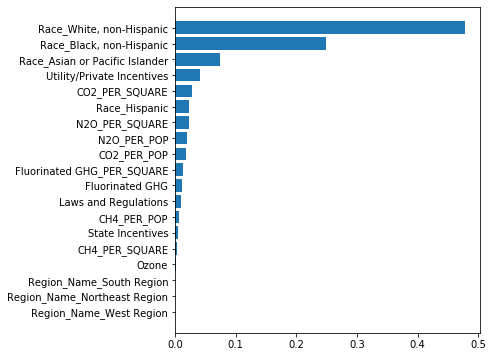

In [18]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_0.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 1

Segment 1 (yellow):

High Ozone level but low other pollutant emissions, such as WA and MA. The most common group

In [19]:
X = group_1.values[:,1:].copy()
y = group_1.DataValue.values

In [20]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

nmc = 100

#Linear Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(model, X, y, cv=cvf,return_train_score=True)
print('---- Gradient Boosting Regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- Gradient Boosting Regression ----
0.9562159629412663
0.9148372567666521


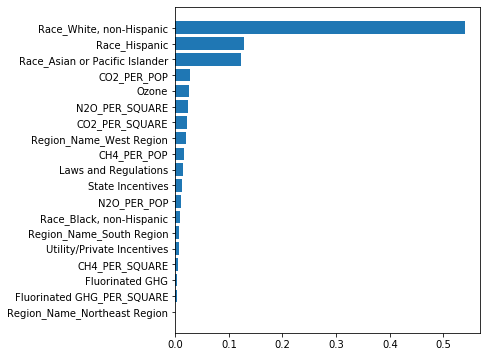

In [21]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 2

Segment 2:

High CO2, CH4, N2O, and low regulation or incentives, such as FL and TX

In [22]:
X = group_2.values[:,1:].copy()
y = group_2.DataValue.values

In [23]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

nmc = 100

#Linear Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(model, X, y, cv=cvf,return_train_score=True)
print('---- Gradient Boosting Regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- Gradient Boosting Regression ----
0.9986002542145161
0.9480458821332282


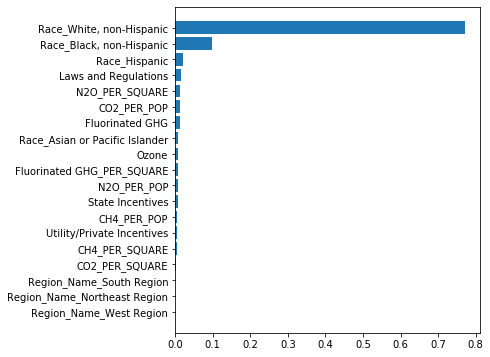

In [24]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 3

Segment 3:

High regulation and incentives, such as CA.

In [25]:
X = group_3.values[:,1:].copy()
y = group_3.DataValue.values

In [26]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

nmc = 100

#Linear Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(model, X, y, cv=cvf,return_train_score=True)
print('---- Gradient Boosting Regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- Gradient Boosting Regression ----
0.999579940657672
0.9865913430623661


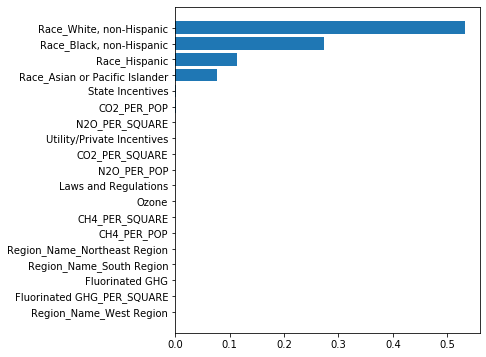

In [27]:

from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_3.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()